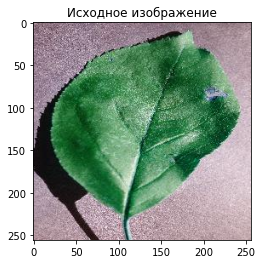

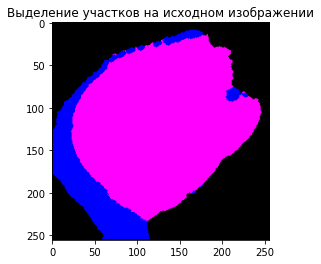

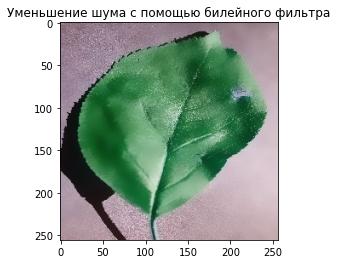

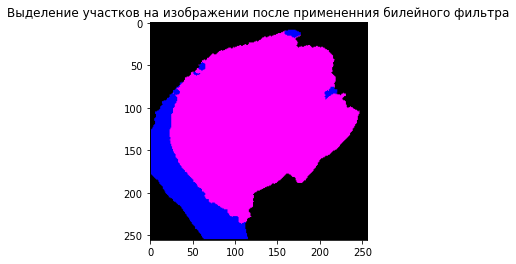

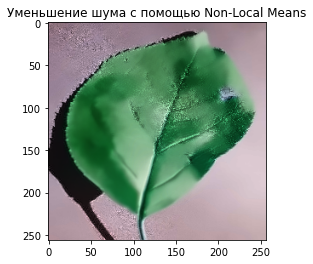

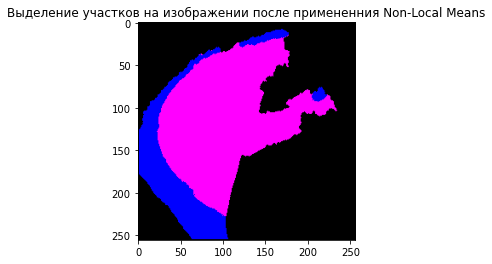

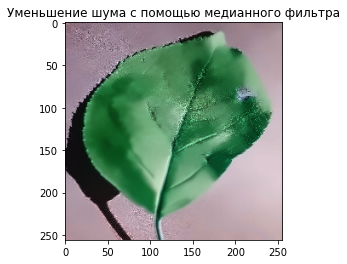

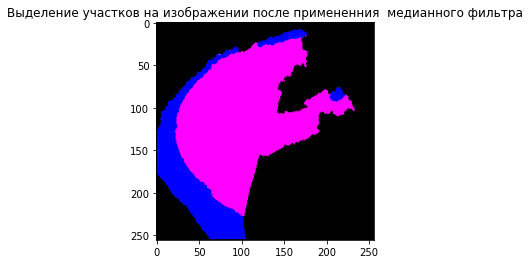

для выделение поврежденных участков листв лучше всего использовать билейнный фильтр. Он более точно выделил поврежденные участки листа, но лучше всего не использовать никакие фильтры на исходном изображении  и так точно выделяются пврежденные уастки


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

path = r'C:\Users\Dragonsnom\Desktop\2.jpg'
img = cv.imread (path)

def CalcOfDamageAndNonDamage (image_name):
    image = cv.imread(image_name)
    
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
    image_erode = cv.erode(image, kernel)
    hsv_img = cv.cvtColor(image_erode, cv.COLOR_BGR2HSV)

    markers = np.zeros((image.shape[0], image.shape[1]), dtype = "int32")
    markers[90:140, 90:140] = 255
    markers[236:255, 0:20] = 1
    markers[0:20, 0:20] = 1
    markers[0:20, 236:255] = 1
    markers[236:255, 236:255] = 1
    leafs_area_BGR = cv.watershed(image_erode, markers)

    healthy_part = cv.inRange(hsv_img, (36, 25, 25), (86, 255, 255))
    ill_part = leafs_area_BGR - healthy_part
    
    mask = np.zeros_like(image, np.uint8)
    mask[leafs_area_BGR > 1] = (255, 0, 255)
    mask[ill_part > 1] = (0, 0, 255)
    return mask

source = CalcOfDamageAndNonDamage(path)

bl = cv.bilateralFilter(img, 15, 75, 75)
cv.imwrite("bl.png", bl)

dst = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
cv.imwrite("dst.png", dst)

median = cv.medianBlur(img, ksize = 3)
cv.imwrite("median.png", dst)


plt.imshow(img)
plt.title("Исходное изображение")
plt.show()

plt.imshow(source)
plt.title("Выделение участков на исходном изображении")
plt.show()

blfilter = cv.imread ("bl.png")
plt.imshow(blfilter)
plt.title("Уменьшение шума c помощью билейного фильтра")
plt.show()

blfilter1 = CalcOfDamageAndNonDamage("bl.png")
plt.imshow(blfilter1)
plt.title("Выделение участков на изображении после примененния билейного фильтра")
plt.show()

Meansfilter = cv.imread ("dst.png")
plt.imshow(Meansfilter)
plt.title("Уменьшение шума c помощью Non-Local Means")
plt.show()

Meansfilter1 = CalcOfDamageAndNonDamage("dst.png")
plt.imshow(Meansfilter1)
plt.title("Выделение участков на изображении после примененния Non-Local Means")
plt.show()

Meansfilter = cv.imread ("median.png")
plt.imshow(Meansfilter)
plt.title("Уменьшение шума c помощью медианного фильтра")
plt.show()
Meansfilter1 = CalcOfDamageAndNonDamage("median.png")
plt.imshow(Meansfilter1)
plt.title("Выделение участков на изображении после примененния  медианного фильтра")
plt.show()

print("для выделение поврежденных участков листв лучше всего использовать билейнный фильтр. Он более точно выделил поврежденные участки листа, но лучше всего не использовать никакие фильтры на исходном изображении  и так точно выделяются пврежденные уастки")
